In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load the data
df = pd.read_csv('HR_comma_sep.csv')


In [16]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
# 2. Prepare the Data (Preprocessing)
# Convert 'salary' into numbers the computer can understand
salary_dummies = pd.get_dummies(df['salary'], prefix='salary')
X = pd.concat([df[['satisfaction_level', 'average_montly_hours']], salary_dummies], axis=1)
y = df['left']

In [3]:
# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 3. Create and Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
# 4. Find Accuracy
predictions = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, predictions):.2%}")

Accuracy Score: 76.37%


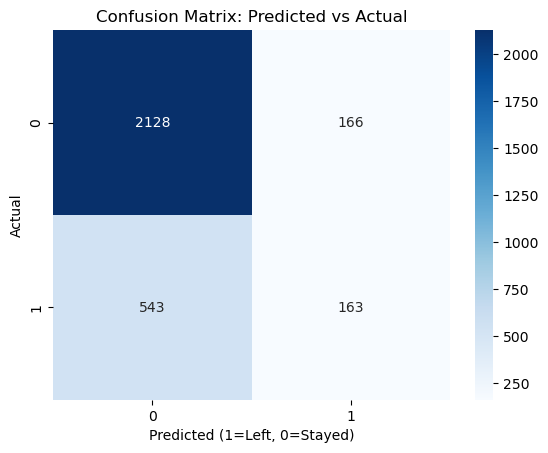

In [6]:
# 5. Visualization (Confusion Matrix)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.xlabel('Predicted (1=Left, 0=Stayed)')
plt.ylabel('Actual')
plt.show()

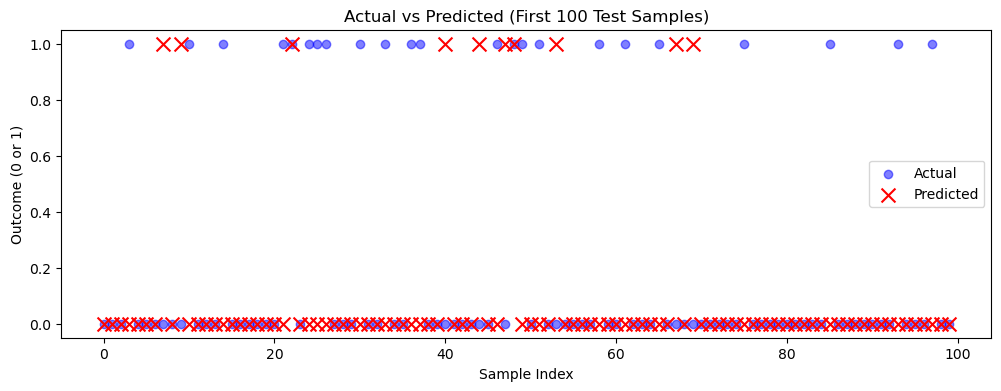

In [7]:
# 2. Scatter Plot: Actual vs Predicted (First 100 test cases)
plt.figure(figsize=(12, 4))
plt.scatter(range(100), y_test[:100], color='blue', label='Actual', marker='o',alpha=0.5)
plt.scatter(range(100), predictions[:100], color='red', label='Predicted', marker='x', s=100)
plt.title('Actual vs Predicted (First 100 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Outcome (0 or 1)')
plt.legend()
plt.show()